In [1]:
import pandas as pd
from modules import crfb
from modules import covid

In [2]:
# Get the most recent dataset that we have on file
df = crfb.get_data_single()
# Download all the datasets we have, using the column 'Date CRFB Downloaded'
#df = crfb.get_data_all()
#df
df = df.loc[df['Recipient Type'] == 'Health Provider']
df

loading data from date 2021-02-09 : file 20210209_cmt.xlsx...


,Recipient State,Amount Committed/Disbursed,Date,Recipient Type,Legislation,Agency
1320,Alabama,4.494819e+08,2020-04-10,Health Provider,CARES Act,HHS
1321,Alaska,7.124812e+07,2020-04-10,Health Provider,CARES Act,HHS
1322,Arizona,7.075875e+08,2020-04-10,Health Provider,CARES Act,HHS
1323,Arkansas,3.265360e+08,2020-04-10,Health Provider,CARES Act,HHS
1324,California,2.920961e+09,2020-04-10,Health Provider,CARES Act,HHS
...,...,...,...,...,...,...
7286,Wisconsin,7.085824e+07,2020-05-08,Health Provider,NaN,CMS
7287,Wyoming,2.499184e+06,2020-05-08,Health Provider,NaN,CMS
7288,Minnesota,3.312674e+07,2020-05-06,Health Provider,CARES Act,HHS
7289,Montana,1.386604e+07,2020-05-06,Health Provider,CARES Act,HHS


In [3]:
#check if all the column have the same amount of values
states = 'Recipient State'
money = 'Amount Committed/Disbursed'
df.all()


Recipient State               True
Amount Committed/Disbursed    True
Date                          True
Recipient Type                True
Legislation                   True
Agency                        True
dtype: bool

In [4]:
#checking for null values
df[df[money].isnull() == True]

,Recipient State,Amount Committed/Disbursed,Date,Recipient Type,Legislation,Agency


In [5]:
#checking for NA values
df[df[money].isna() == True]

,Recipient State,Amount Committed/Disbursed,Date,Recipient Type,Legislation,Agency


In [6]:
#checking for 0. values
df[df[money] == 0.]

,Recipient State,Amount Committed/Disbursed,Date,Recipient Type,Legislation,Agency


In [7]:
state_group_df = df.groupby('Recipient State')[money].mean().reset_index()
state_group_df



,Recipient State,Amount Committed/Disbursed
0,Alabama,1.792775e+08
1,Alaska,4.181529e+07
2,Arizona,2.210583e+08
3,Arkansas,1.372664e+08
4,California,1.148195e+09
5,Colorado,1.762672e+08
6,Connecticut,1.881214e+08
7,Delaware,6.059996e+07
8,Florida,7.226082e+08
9,Georgia,3.934504e+08


In [8]:
territory_list = ['American Samoa','Guam','Micronesia','Northern Mariana Islands','Palau','Puerto Rico', 'US Virgin Islands']
territory_grouped_df = state_group_df[state_group_df[states].isin(territory_list) == True]
territory_grouped_df

,Recipient State,Amount Committed/Disbursed


In [9]:
idx_list = territory_grouped_df.index
print(idx_list)
state_group_df = state_group_df.drop(axis = 0, index = idx_list).reset_index(drop=True)
state_group_df

Int64Index([], dtype='int64')


,Recipient State,Amount Committed/Disbursed
0,Alabama,1.792775e+08
1,Alaska,4.181529e+07
2,Arizona,2.210583e+08
3,Arkansas,1.372664e+08
4,California,1.148195e+09
5,Colorado,1.762672e+08
6,Connecticut,1.881214e+08
7,Delaware,6.059996e+07
8,Florida,7.226082e+08
9,Georgia,3.934504e+08


In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def bar_plot(labels, bars, title):
    fig, ax = plt.subplots(figsize=(15,8))

    labels = labels.to_list()
    width = 0.8  # the width of the bars
    x = np.arange(len(labels))
    ax.bar(x,bars, width)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Average '+money+' ($)', fontsize = (18))
    ax.set_title(title, fontsize = (25))
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize = (17), rotation = 'vertical')
    plt.yticks(fontsize=18)

    return(plt.show())

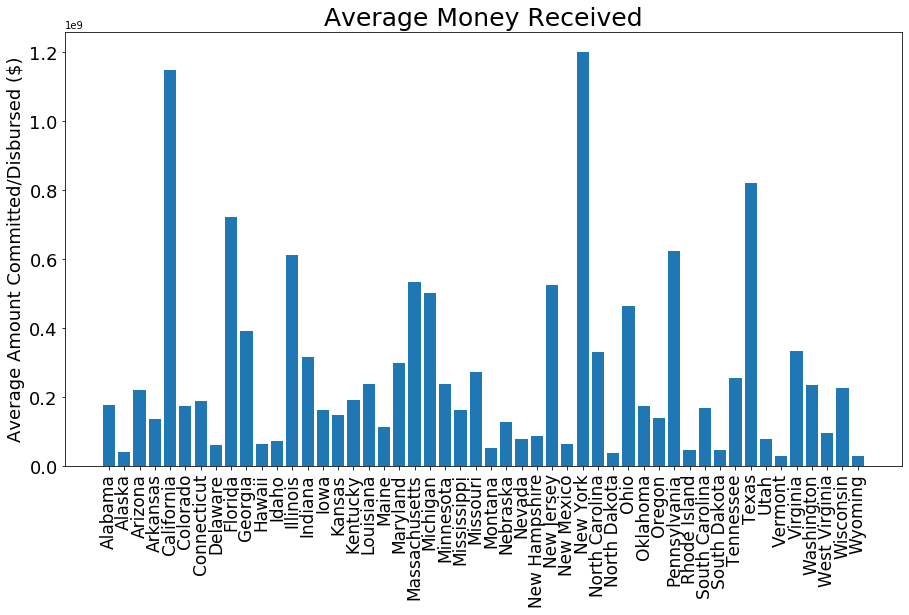

In [11]:
#plotting the data for all the states
bar_plot(state_group_df[states],  state_group_df[money], 'Average Money Received')

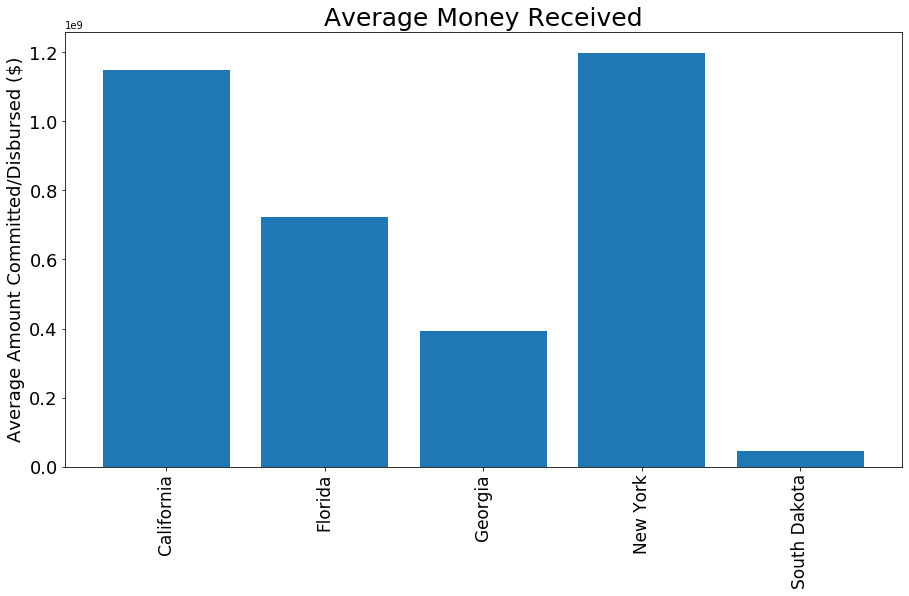

In [12]:
#plotting the data only for the states of interest
state_OI = ['New York', 'South Dakota','Florida', 'California','Georgia']
state_groupOI_df = state_group_df.loc[state_group_df[states].isin(state_OI)]
bar_plot(state_groupOI_df[states],  state_groupOI_df[money], 'Average Money Received')

In [13]:
# starting to build the plot for showing the trend over the time per each state of interest

states_df = df.loc[df[states].isin(territory_list) == False]
states_df

,Recipient State,Amount Committed/Disbursed,Date,Recipient Type,Legislation,Agency
1320,Alabama,4.494819e+08,2020-04-10,Health Provider,CARES Act,HHS
1321,Alaska,7.124812e+07,2020-04-10,Health Provider,CARES Act,HHS
1322,Arizona,7.075875e+08,2020-04-10,Health Provider,CARES Act,HHS
1323,Arkansas,3.265360e+08,2020-04-10,Health Provider,CARES Act,HHS
1324,California,2.920961e+09,2020-04-10,Health Provider,CARES Act,HHS
...,...,...,...,...,...,...
7286,Wisconsin,7.085824e+07,2020-05-08,Health Provider,NaN,CMS
7287,Wyoming,2.499184e+06,2020-05-08,Health Provider,NaN,CMS
7288,Minnesota,3.312674e+07,2020-05-06,Health Provider,CARES Act,HHS
7289,Montana,1.386604e+07,2020-05-06,Health Provider,CARES Act,HHS


In [14]:
import datetime as dt
#converting the dates in timestamp - it will serve the purpose later on probably
dates = states_df['Date'].to_list()
timestamp = [dt.datetime.timestamp(dates[x]) for x, date in enumerate(dates) ]
states_df['Timestamp'] = timestamp
states_df

,Recipient State,Amount Committed/Disbursed,Date,Recipient Type,Legislation,Agency,Timestamp
1320,Alabama,4.494819e+08,2020-04-10,Health Provider,CARES Act,HHS,1.586491e+09
1321,Alaska,7.124812e+07,2020-04-10,Health Provider,CARES Act,HHS,1.586491e+09
1322,Arizona,7.075875e+08,2020-04-10,Health Provider,CARES Act,HHS,1.586491e+09
1323,Arkansas,3.265360e+08,2020-04-10,Health Provider,CARES Act,HHS,1.586491e+09
1324,California,2.920961e+09,2020-04-10,Health Provider,CARES Act,HHS,1.586491e+09
...,...,...,...,...,...,...,...
7286,Wisconsin,7.085824e+07,2020-05-08,Health Provider,NaN,CMS,1.588910e+09
7287,Wyoming,2.499184e+06,2020-05-08,Health Provider,NaN,CMS,1.588910e+09
7288,Minnesota,3.312674e+07,2020-05-06,Health Provider,CARES Act,HHS,1.588738e+09
7289,Montana,1.386604e+07,2020-05-06,Health Provider,CARES Act,HHS,1.588738e+09


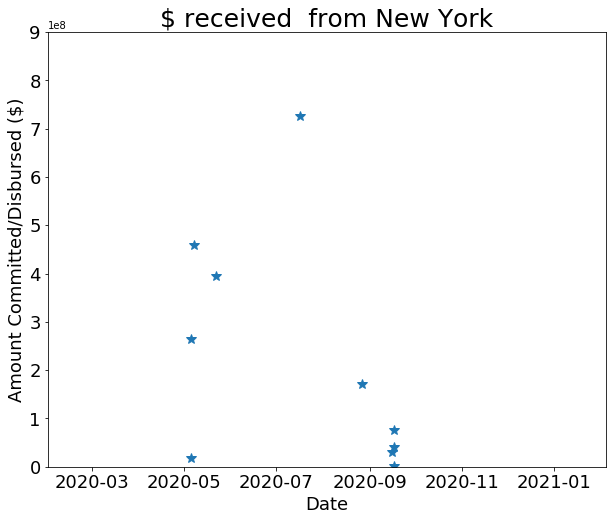

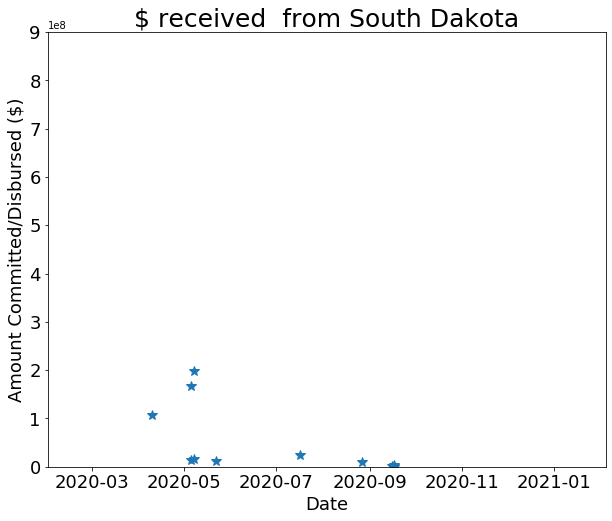

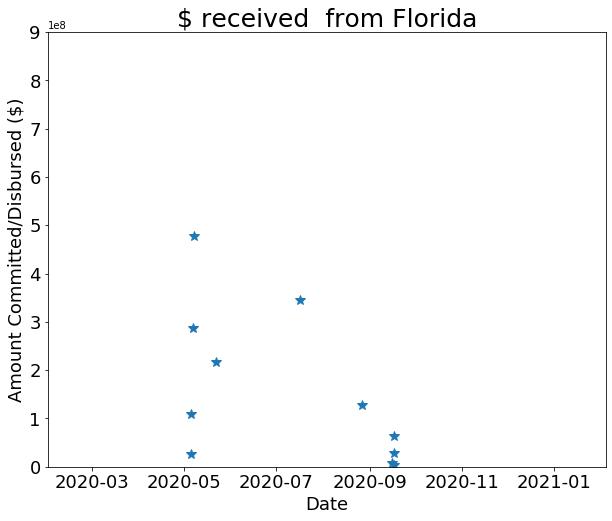

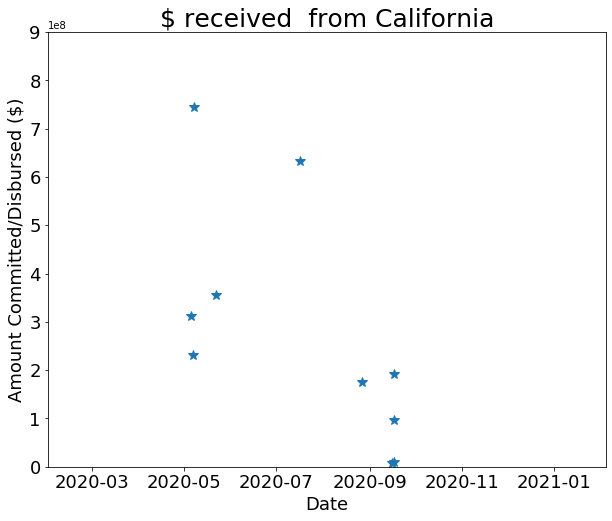

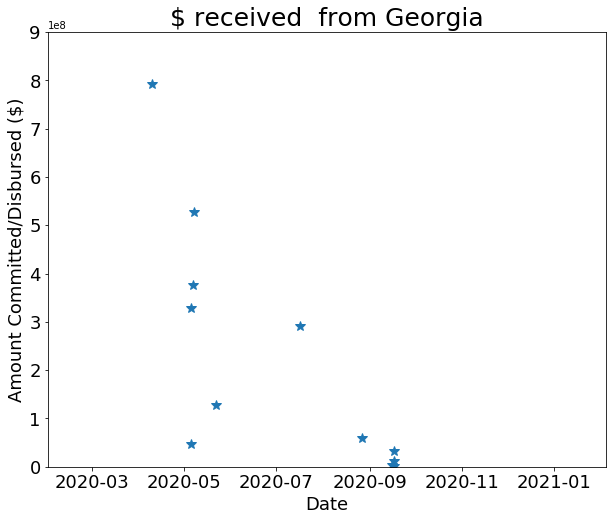

In [16]:
# different amounts in the same date uhmm
start_date = dt.date(2020, 2, 1)
end_date = dt.date(2021, 2, 4)
for state in state_OI:
    State = states_df.loc[states_df[states]== state]
    plt.subplots(figsize=(10,8))
    plt.plot(State['Date'],State[money], ls = 'none', marker = '*', markersize = 10)
    plt.ylabel(money+' ($)', fontsize = (18))
    plt.xlabel('Date', fontsize = (18))
    plt.title('$ received  from '+state, fontsize = (25))
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.ylim(0,900000000)
    plt.xlim(start_date,end_date)
    plt.show()
   

In [17]:
# To filter by date use
covid_df = covid.get_data(date_min=dt.datetime(2020, 10, 23), date_max=dt.datetime(2021, 2, 9))
# else, use this
#covid_df = covid.get_data()
covid_df

,date,state,positive,negative,onVentilatorCumulative,recovered,death,hospitalized,positiveTests
1,2021-02-09,Alabama,474666.0,1825185.0,1463.0,252880.0,8579.0,43499.0,0
2,2021-02-09,Arkansas,308848.0,2297201.0,1464.0,288774.0,5148.0,14174.0,74670
18,2021-02-09,Kansas,282960.0,920799.0,411.0,5954.0,4197.0,8749.0,0
48,2021-02-09,Utah,356040.0,1467542.0,754.0,324102.0,1748.0,13950.0,436658
57,2021-02-08,Alabama,473348.0,1820080.0,1460.0,252880.0,8523.0,43383.0,0
...,...,...,...,...,...,...,...,...,...
6096,2020-10-24,Utah,103117.0,889617.0,417.0,75776.0,568.0,4997.0,118274
6105,2020-10-23,Alabama,180916.0,1133858.0,1148.0,74439.0,2859.0,19595.0,0
6106,2020-10-23,Arkansas,104135.0,1170162.0,807.0,93215.0,1782.0,6678.0,7546
6122,2020-10-23,Kansas,76230.0,540032.0,309.0,2518.0,975.0,3584.0,0


In [21]:
positive = 'positiveTests'
ventilator = 'onVentilatorCumulative'
covid_df.all()

date                       True
state                      True
positive                   True
negative                   True
onVentilatorCumulative     True
recovered                  True
death                      True
hospitalized               True
positiveTests             False
dtype: bool

In [22]:
#checking for null values
covid_df[covid_df[positive].isnull() == True]

,date,state,positive,negative,onVentilatorCumulative,recovered,death,hospitalized,positiveTests


In [24]:
#checking for NA values
covid_df[covid_df[positive].isna() == True]

,date,state,positive,negative,onVentilatorCumulative,recovered,death,hospitalized,positiveTests


In [25]:
#checking for 0. values
covid_df[covid_df[positive] == 0.]

,date,state,positive,negative,onVentilatorCumulative,recovered,death,hospitalized,positiveTests
1,2021-02-09,Alabama,474666.0,1825185.0,1463.0,252880.0,8579.0,43499.0,0
18,2021-02-09,Kansas,282960.0,920799.0,411.0,5954.0,4197.0,8749.0,0
57,2021-02-08,Alabama,473348.0,1820080.0,1460.0,252880.0,8523.0,43383.0,0
74,2021-02-08,Kansas,282960.0,920799.0,411.0,5954.0,4197.0,8749.0,0
113,2021-02-07,Alabama,472423.0,1816273.0,1460.0,252880.0,8515.0,43005.0,0
...,...,...,...,...,...,...,...,...,...
6010,2020-10-25,Kansas,76230.0,540032.0,309.0,2518.0,975.0,3584.0,0
6049,2020-10-24,Alabama,183276.0,1138922.0,1157.0,74439.0,2866.0,19595.0,0
6066,2020-10-24,Kansas,76230.0,540032.0,309.0,2518.0,975.0,3584.0,0
6105,2020-10-23,Alabama,180916.0,1133858.0,1148.0,74439.0,2859.0,19595.0,0
